In [1]:
import sys
sys.path.append("../")


import os
%matplotlib inline
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from patsy import dmatrices
from openpyxl import load_workbook

data_path = start.data_path
table_path = start.table_path

In [2]:
data = pd.read_csv(os.path.join(data_path, 'clean', 'master_data_district.csv'),
                  sep=",", low_memory= False)
data15 = data[data.year == 2015]
data18 = data[data['year'] == 2018]
data18.loc[:, 'eligible'] = np.where(((data18.rating_academic == 'D') | (data18.rating_academic == 'F')), False, True)
# Ignore charters
data18 = data18[data18.distischarter == "N"]

/Users/kylieleblancKylie/anaconda/envs/spacy/lib/python3.7/site-packages/pandas/core/indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [3]:
len(data18)

1023

In [4]:
# Ineligible
len(data18[(data18.eligible == False) & (data18.doi == False)])

14

In [5]:
# Number opting out
len(data18[((data18.eligible == True) & (data18.doi == False))])

187

In [6]:
# DOIs
len(data18[data18.doi == True])

822

In [7]:
data18.doi.value_counts()

True     822
False    201
Name: doi, dtype: int64

In [8]:
district_df = pd.DataFrame(data.groupby(['district']).agg({'doi_year': 'mean'}))
district_counts = pd.DataFrame(district_df.doi_year.value_counts(sort = False))
district_counts = district_counts.sort_index()
district_counts

,doi_year
2015.0,1
2016.0,69
2017.0,585
2018.0,133
2019.0,23


In [9]:
district_counts.doi_year.cumsum() 

2015.0      1
2016.0     70
2017.0    655
2018.0    788
2019.0    811
Name: doi_year, dtype: int64

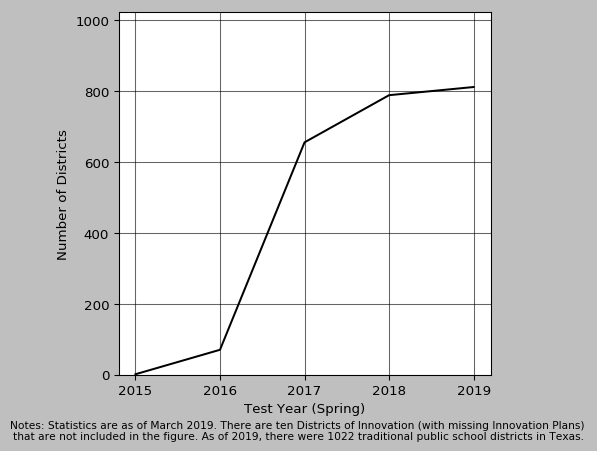

In [11]:
import matplotlib
plt.style.use('grayscale')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

# Pre
plt.plot(['2015', '2016', '2017', '2018', '2019'], district_counts.doi_year.cumsum() , color = 'black')

plt.ylabel('Number of Districts')
#plt.title('Texas District of Innovation Takeup Over Time')
plt.xlabel('Test Year (Spring)', size = 'medium')
plt.grid(True, alpha = .6)


plt.ylim(0, 1022)
txt="Notes: Statistics are as of March 2019. There are ten Districts of Innovation (with missing Innovation Plans) \n that are not included in the figure. As of 2019, there were 1022 traditional public school districts in Texas."
plt.figtext(.5,-.01, txt, wrap=True, horizontalalignment='center', fontsize=8)

plt.savefig(table_path + 'takeup.png', dpi = 600, bbox_inches="tight")
plt.show()